#Método de Euler Mejorado o Método de Heun

\begin{eqnarray*}
y_i' &=& f(x_i, y_i) \\
y_{i+1}^0 &=& y_i + f(x_i, y_i) h \\
y_{i+1} &=& y_i + \frac{f(x_i, y_i) + f(x_i, y_{i+1}^0)}{2}h
\end{eqnarray*}

#Runge Kutta Órden 4

\begin{eqnarray*}
k_1 &=& f(x_i, y_i)\\
k_2 &=& f(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_1 h)\\
k_3 &=& f(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_2 h)\\
k_4 &=& f(x_i + h, y_i + k_3 h)\\
y_{i+1} &=& \frac{h}{6} \Big( k_1 + 2k_2 + 2k_3 + k_4 \Big)
\end{eqnarray*}

Usemos el Métod de Euler Mejorado y de Runge Kutta 4 para calcular 

\begin{eqnarray}
y' &=& 4e^{0.8x} - 0.5y \\
y(0) &=& 2 \\
x \in [0, 4] \\
h &=& 1
\end{eqnarray}

La solución analítica a este problema es 
$$
y = \frac{4}{1.3}\Big( e^{0.8x} - e^{-0.5x} \Big) + 2e^{-0.5x}
$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np;
%matplotlib inline

def Analytical(x):
    return (4.0/1.3) * (np.exp(0.8*x) - np.exp(-0.5*x)) + 2*np.exp(-0.5*x);

#definicion de la funcion para los valores iniciales
def f(x, y):
    return 4*np.exp(0.8*x) - 0.5*y;

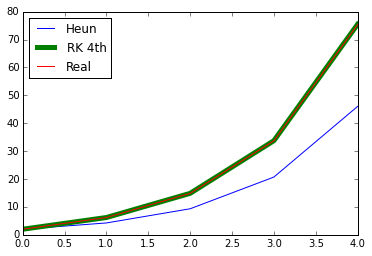

In [46]:
h = 1.0;
x = np.arange(0, 5);
y_heun = np.zeros(x.size);

y_heun[0] = 2;
y_kutta = y_heun.copy();
y_real = Analytical(x);

for i in xrange(1, x.size):
    
    f_prev = f(x[i-1],y_heun[i-1]);
    predictor = y_heun[i-1] + f_prev * h;
    y_heun[i] = y_heun[i-1] + (h*0.5)*(f_prev + f(x[i-1], predictor));
    
    # Runge Kutta 4th order
    k1 = f(x[i-1], y_kutta[i-1]);
    k2 = f(x[i-1] + 0.5*h, y_kutta[i-1] + 0.5*k1*h);
    k3 = f(x[i-1] + 0.5*h, y_kutta[i-1] + 0.5*k2*h);
    k4 = f(x[i-1] + h, y_kutta[i-1] + k3*h);
    y_kutta[i] = y_kutta[i-1] + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4);
    
heun, = plt.plot(x, y_heun, label='Heun');
kutta, = plt.plot(x, y_kutta, label='RK 4th', lw=5);
real, = plt.plot(x, y_real, label='Real');
plt.legend(handles=[heun, kutta, real], loc=0)

#Conclusión

Este ejemplo nos muestra que el método de **Runge Kutta 4** es más preciso

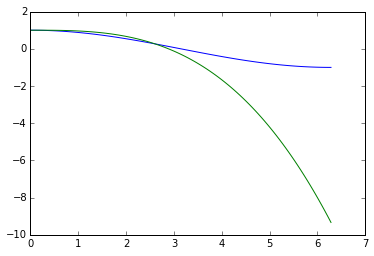

In [3]:
def Oscilator(A, w, t, phi):
    return A*np.cos(w*t + phi);

def Oscilator_Derivative(A, w, t, phi):
    return -A*w*np.sin(w*t + phi);

data = np.linspace(0, 2*np.pi, 100, retstep=True);
t = data[0];
h = data[1];
A = 1;
w = 0.5;
phi = 0;

def f(x, y, z):
    return z;

def g(x, y, z):
    return -(w**2)*x;

y_0_real = Oscilator(A, w, t, phi);
y_1_real = Oscilator_Derivative(A, w, t, phi);

# Set initial Values
y = t.copy();
y[0] = Oscilator(A, w, 0, phi);
z = t.copy();
z[0] = Oscilator_Derivative(A, w, 0, phi);

# Runge Kutta coefficients
for i in xrange(1, t.size):
    k1 = f(t[i-1], y[i-1], z[i-1]);
    l1 = g(t[i-1], y[i-1], z[i-1])
    
    k2 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k1*h, z[i-1] + 0.5*l1*h);
    l2 = g(t[i-1] + 0.5*h, y[i-1] + 0.5*k1*h, z[i-1] + 0.5*l1*h);
    
    k3 = f(t[i-1] + 0.5*h, y[i-1] + 0.5*k2*h, z[i-1] + 0.5*l2*h);
    l3 = g(t[i-1] + 0.5*h, y[i-1] + 0.5*k2*h, z[i-1] + 0.5*l2*h);
    
    k4 = f(t[i-1] + h, y[i-1] + k3*h, z[i-1] + l3*h);
    l4 = g(t[i-1] + h, y[i-1] + k3*h, z[i-1] + l3*h);
    
    y[i] = y[i-1] + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4);
    z[i] = z[i-1] + (h/6.0) * (l1 + 2*l2 + 2*l3 + l4);
    
    

plt.plot(t, y_0_real, t, y);

In [7]:
from scipy.integrate import odeint

odeint()

help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y,t0,...)
    
    where y can be a vector.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to 